In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [3]:
model = models.Sequential()

model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))

model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda (Lambda)              (None, 56, 56, 96)        0         
_________________________________________________________________
activation (Activation)      (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_1 (Lambda)            (None, 7, 7, 256)         0

In [4]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
907/907 [==============================] - 1652s 2s/step - loss: 0.4271 - accuracy: 0.8419 - val_loss: 0.0652 - val_accuracy: 0.9840
Epoch 2/10
907/907 [==============================] - 1569s 2s/step - loss: 0.0961 - accuracy: 0.9747 - val_loss: 0.0530 - val_accuracy: 0.9850
Epoch 3/10
907/907 [==============================] - 1565s 2s/step - loss: 0.0704 - accuracy: 0.9817 - val_loss: 0.0550 - val_accuracy: 0.9900
Epoch 4/10
907/907 [==============================] - 1520s 2s/step - loss: 0.0603 - accuracy: 0.9846 - val_loss: 0.0324 - val_accuracy: 0.9910
Epoch 5/10
907/907 [==============================] - 1482s 2s/step - loss: 0.0520 - accuracy: 0.9870 - val_loss: 0.0538 - val_accuracy: 0.9890
Epoch 6/10
907/907 [==============================] - 1609s 2s/step - loss: 0.0425 - accuracy: 0.9893 - val_loss: 0.0505 - val_accuracy: 0.9890
Epoch 7/10
907/907 [==============================] - 1537s 2s/step - loss: 0.0376 - accuracy: 0.9909 - val_loss: 0.0504 - val_accuracy:

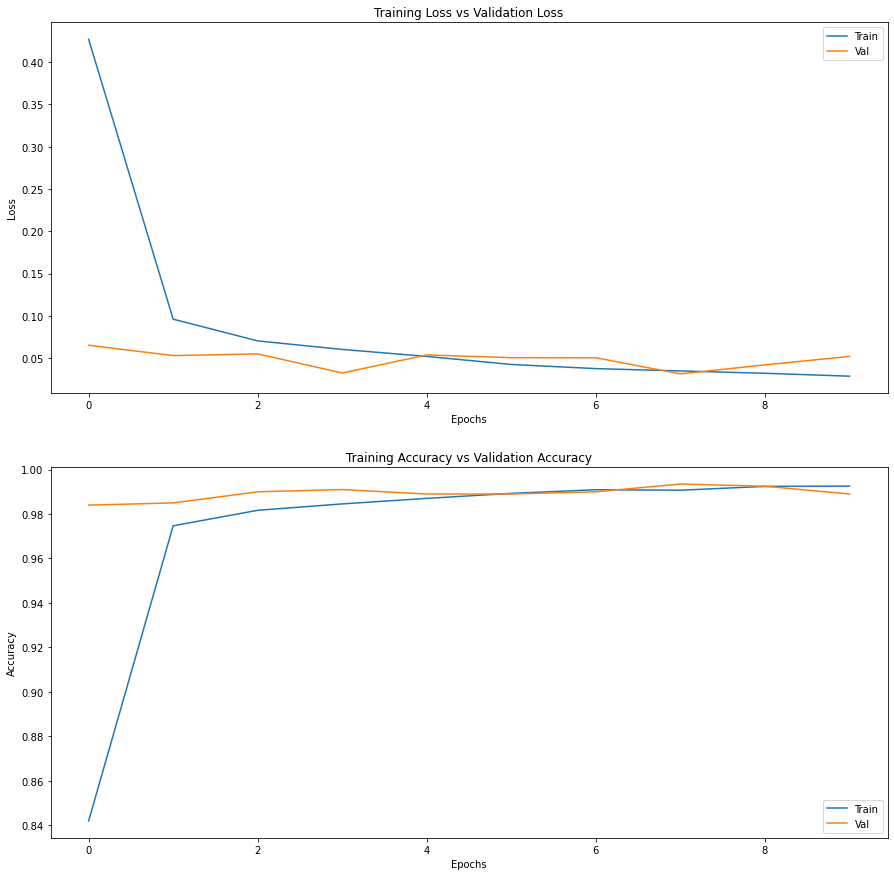

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])


In [12]:
score = model.evaluate(x_test, y_test)
print("Hyperparameters : {} \n".format(model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 65s 207ms/step - loss: 0.0693 - accuracy: 0.9874
Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 

Test loss: 0.06932281702756882
Test accuracy: 0.9873999953269958


In [16]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import seaborn as sn

y_predict=model.predict(x_test)
#accuracy_score(y_test,y_predict)

In [20]:
pip install mlxtend

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Truth')

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets